# Clean bike rider data

TODO Description

Goal: From raw, hourly bike rider counts to cleaned daily bike rider counts.

In the following, we import hourly bike rider counts of different bike rider counting stations in Baden-Württemberg, collected in 2021. 
Based on this data, we compute daily sums of bike rider counts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from datetime import timedelta, date

## Import raw bike rider counts data

In [2]:
# paths to data (one file per month)
dat_paths = ['./../data/raw/eco_counter_fahrradzaehler_20210' + str(i) + '.csv' for i in range(1,10)]
dat_paths = dat_paths + ['./../data/raw/eco_counter_fahrradzaehler_2021' + str(i) + '.csv' for i in range(10,13)]
dat_paths = dat_paths + ['./../data/raw/eco_counter_fahrradzaehler_20220' + str(i) + '.csv' for i in range(1,10)]

# read in the data
dats = [pd.read_csv(path) for path in dat_paths]

# concatenate monthly data to get data of whole year in one dataframe
hourly_bike_rider_counts = pd.concat(dats)

In [3]:
# check whether import of data worked
hourly_bike_rider_counts.head()

,timestamp,iso_timestamp,zählstand,stand,standort,channel_name,channel_id,counter_site,counter_site_id,domain_name,domain_id,longitude,latitude,timezone,interval,counter_serial
0,2021-01-01T01:00:00+0000,2021-01-01T01:00:00+0100,2,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.40913,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496
1,2021-01-01T02:00:00+0000,2021-01-01T02:00:00+0100,0,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.40913,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496
2,2021-01-01T03:00:00+0000,2021-01-01T03:00:00+0100,1,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.40913,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496
3,2021-01-01T04:00:00+0000,2021-01-01T04:00:00+0100,1,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.40913,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496
4,2021-01-01T05:00:00+0000,2021-01-01T05:00:00+0100,2,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.40913,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496


## Adjust column names

Remove umlaut 'ä'

In [4]:
# adjust column name
hourly_bike_rider_counts.rename(columns = {'zählstand':'rider_count'}, inplace = True)
hourly_bike_rider_counts.head()

,timestamp,iso_timestamp,rider_count,stand,standort,channel_name,channel_id,counter_site,counter_site_id,domain_name,domain_id,longitude,latitude,timezone,interval,counter_serial
0,2021-01-01T01:00:00+0000,2021-01-01T01:00:00+0100,2,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.40913,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496
1,2021-01-01T02:00:00+0000,2021-01-01T02:00:00+0100,0,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.40913,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496
2,2021-01-01T03:00:00+0000,2021-01-01T03:00:00+0100,1,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.40913,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496
3,2021-01-01T04:00:00+0000,2021-01-01T04:00:00+0100,1,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.40913,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496
4,2021-01-01T05:00:00+0000,2021-01-01T05:00:00+0100,2,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.40913,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496


## Clean spelling / renaming issues

(The issues were observed and described in 01_inspect_bike_rider_data.ipynb)

In [5]:
# correct spelling of 'Ludwigsburg'
hourly_bike_rider_counts = hourly_bike_rider_counts.replace(to_replace='Stadt Ludwisburg', value='Stadt Ludwigsburg')

In [6]:
# adjust channel names of the channels that were renamed in the middle of the year
# (such that this counter site also adheres to the location nesting format)
hourly_bike_rider_counts = hourly_bike_rider_counts.replace(to_replace='Schlieffenstraße Stadteinwärts A', value='Schlieffenstraße Stadteinwärts')
hourly_bike_rider_counts = hourly_bike_rider_counts.replace(to_replace='Schlieffenstraße Stadtauswärts A', value='Schlieffenstraße Stadtauswärts')
hourly_bike_rider_counts = hourly_bike_rider_counts.replace(to_replace='Schlieffenstraße Stadteinwärts B', value='Schlieffenstraße Stadteinwärts')
hourly_bike_rider_counts = hourly_bike_rider_counts.replace(to_replace='Schlieffenstraße Stadtauswärts B', value='Schlieffenstraße Stadtauswärts')

## Description of hourly bike rider counts

In [7]:
# get overview over dataset: how many hourly measurements have been collected
# at which counting station

# number of hourly measurements
num_datapoints = len(hourly_bike_rider_counts)
print('The dataset contains', num_datapoints, 'hourly bike rider counts.')

# get number of cities, counter sites and channels at which bike rider counts
# were collected
cities = list(set(hourly_bike_rider_counts['standort']))
num_cities = len(hourly_bike_rider_counts.groupby(['standort']))
num_countersites = len(hourly_bike_rider_counts.groupby(['standort', 'counter_site']))
num_channelids = len(hourly_bike_rider_counts.groupby(['standort', 'counter_site', 'channel_name', 'channel_id']))

# print
print('The bike rider counts were collected at', num_channelids, 'unique counting stations ("counting station" refers to a unique combination of standort, counter_site, channel_name, and channel_id). The counting stations are spread in', num_cities, 'cities (namely:', cities, '), across', num_countersites, 'counter sites.')


# print
print('The following overview shows how many hourly bike rider counts stem from which counting station:')

# overview how many hourly rider counts stem from which counting station
# (Here, "counting station" refers to a unique combination of 'standort', 'counter_site', 'channel_name', and 'channel_id'.)
overview_origin_of_collected_hourly_rider_counts = hourly_bike_rider_counts.groupby(['standort', 'counter_site', 'channel_name', 'channel_id'], as_index=False).size()
overview_origin_of_collected_hourly_rider_counts.rename(columns = {'size':'number_of_hourly_rider_count_datapoints'}, inplace = True)
overview_origin_of_collected_hourly_rider_counts

The dataset contains 1415363 hourly bike rider counts.
The bike rider counts were collected at 109 unique counting stations ("counting station" refers to a unique combination of standort, counter_site, channel_name, and channel_id). The counting stations are spread in 6 cities (namely: ['Stadt Offenburg', 'Stadt Freiburg', 'Stadt Konstanz', 'Stadt Heidelberg', 'Stadt Ludwigsburg', 'Stadt Ulm'] ), across 25 counter sites.
The following overview shows how many hourly bike rider counts stem from which counting station:


,standort,counter_site,channel_name,channel_id,number_of_hourly_rider_count_datapoints
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,15291
1,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr. [Bike],353234627,15291
2,Stadt Freiburg,FR2 Güterbahn / Ferd.-Weiß-Str.,FR2 Güterbahn / Ferd.-Weiß-Str.,101014511,15291
3,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,Richtung Norden (Zelt 01_OUT),102017109,15291
4,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,Richtung Süden (Zelt 01_IN),101017109,15291
...,...,...,...,...,...
104,Stadt Offenburg,Hauptstraße neu,Hauptstraße neu,101036542,13365
105,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Stadt,101057246,2876
106,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Stadt,103057246,2876
107,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,102057246,2876


## Compute daily counts

Measurements (bike rider counts) above are given hourly. Now, we sum them to get daily counts.

We want to sum the counts of one day at one counter.  
Before we can simply compute daily sums, we have to adjust the dates to "correct" for counts collected at midnight:  
Counts collected at midnight reflect bikers that passed the counting station in the hour before midnight. Therefore, they have to be taken into account in the sum for the "day before".

In [8]:
# add date information to dataframe

# make 'timestamp' date
hourly_bike_rider_counts['timestamp'] = pd.to_datetime(hourly_bike_rider_counts['timestamp'])

# add simpler date format to each measurement to make grouping by day easier
# For each measurement (row), we want to know on which day the data was 
# collected. In order to adjust for counts collected at midnight, we shift the 
# daytime by 1 second before converting it to date.
# (Thereby, we can simply compute daily sums in the cell below;
#  adding "midnight counts" to the day before by shifting the daytime by 1 sec.)
hourly_bike_rider_counts['date'] = (hourly_bike_rider_counts['timestamp'] - pd.Timedelta(1, 'sec')).dt.date

In [9]:
# sum counts of one day at one counting station
daily_bike_rider_counts = hourly_bike_rider_counts.groupby(by=['standort', 'counter_site', 'channel_name', 'channel_id', 'longitude', 'latitude', 'date'], as_index=False)['rider_count'].sum()

In [10]:
daily_bike_rider_counts

,standort,counter_site,channel_name,channel_id,longitude,latitude,date,rider_count
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-01,521
1,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-02,1131
2,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-03,764
3,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-04,1607
4,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-05,1668
...,...,...,...,...,...,...,...,...
59091,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-26,529
59092,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-27,556
59093,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-28,517
59094,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-29,311


## Clean daily counts

### Require 24 hourly measurements per day

Check whether daily sum consists of 24 hourly values - otherwise exclude hourly data from this day at this counting station.

In [11]:
# number of measurements that we are given per day at one counting station
num_measurements_per_day = hourly_bike_rider_counts.groupby(by=['standort', 'counter_site', 'channel_name', 'channel_id', 'longitude', 'latitude', 'date'], as_index=False).size()
num_measurements_per_day.rename(columns = {'size':'measurements_per_day'}, inplace = True)
num_measurements_per_day

# combine information in one dataframe: daily sum and number of measurements per day that are included in the sum
daily_bike_rider_counts = pd.merge(daily_bike_rider_counts, num_measurements_per_day)
daily_bike_rider_counts

,standort,counter_site,channel_name,channel_id,longitude,latitude,date,rider_count,measurements_per_day
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-01,521,24
1,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-02,1131,24
2,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-03,764,24
3,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-04,1607,24
4,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-05,1668,24
...,...,...,...,...,...,...,...,...,...
59091,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-26,529,24
59092,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-27,556,24
59093,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-28,517,24
59094,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-29,311,24


Exlcude daily counts that were computed as a daily sum of not exactly 24 hourly measurements per day.

In [12]:
# exclude daily counts that were computed as a daily sum of != 24 hourly
# measurements per day
daily_bike_rider_counts_cleaned_from_incomplete_days = daily_bike_rider_counts.loc[daily_bike_rider_counts['measurements_per_day'] == 24]

# remove 'measurements_per_day' column because it is 24 for all rows
del daily_bike_rider_counts_cleaned_from_incomplete_days['measurements_per_day']

daily_bike_rider_counts_cleaned_from_incomplete_days

,standort,counter_site,channel_name,channel_id,longitude,latitude,date,rider_count
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-01,521
1,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-02,1131
2,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-03,764
3,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-04,1607
4,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-05,1668
...,...,...,...,...,...,...,...,...
59090,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-25,795
59091,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-26,529
59092,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-27,556
59093,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-28,517


In [13]:
print('By keeping only those daily sums that consist of excatly 24 hourly measurements, we exclude', len(daily_bike_rider_counts) - len(daily_bike_rider_counts_cleaned_from_incomplete_days), 'of', len(daily_bike_rider_counts), 'daily bike rider "counts".')
print('The following overview shows how the excluded daily sums are distributed over the different counting stations:')

# daily sums that have been excluded because the sum consists of != 24 measurements
excluded = daily_bike_rider_counts[daily_bike_rider_counts['measurements_per_day'] != 24].groupby(['standort', 'counter_site', 'channel_name', 'channel_id'], as_index=False).size()
excluded.rename(columns = {'size':'number_of_excluded_daily_sums'}, inplace = True)
excluded
# TODO document in the report how many daily sums have been excluded by this step

By keeping only those daily sums that consist of excatly 24 hourly measurements, we exclude 2017 of 59096 daily bike rider "counts".
The following overview shows how the excluded daily sums are distributed over the different counting stations:


,standort,counter_site,channel_name,channel_id,number_of_excluded_daily_sums
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,21
1,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr. [Bike],353234627,21
2,Stadt Freiburg,FR2 Güterbahn / Ferd.-Weiß-Str.,FR2 Güterbahn / Ferd.-Weiß-Str.,101014511,21
3,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,Richtung Norden (Zelt 01_OUT),102017109,21
4,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,Richtung Süden (Zelt 01_IN),101017109,21
...,...,...,...,...,...
104,Stadt Offenburg,Hauptstraße neu,Hauptstraße neu,101036542,19
105,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Stadt,101057246,4
106,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Stadt,103057246,4
107,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,102057246,4


In [14]:
# get more details about exclusion
# look at subset of excluded datapoints

print('The following overview shows how many of the excluded daily sums were excluded because only 23 daily measurements were available, separated for the different counting stations:')

# daily sums that have been excluded because the sum consists of == 23 measurements
excluded_23 = daily_bike_rider_counts[daily_bike_rider_counts['measurements_per_day'] == 23].groupby(['standort', 'counter_site', 'channel_name', 'channel_id'], as_index=False)
excluded_23 = daily_bike_rider_counts[daily_bike_rider_counts['measurements_per_day'] == 23].groupby(['standort', 'counter_site', 'channel_name', 'channel_id'], as_index=False).size()
excluded_23.rename(columns = {'size':'number_of_days_with_only_23_measurements'}, inplace = True)
display(excluded_23)

# check dates: end of month? probably last hour of month is missing
print('Below, the dates of the days for which only 23 measurements are available (for some counting stations):')
set(daily_bike_rider_counts[daily_bike_rider_counts['measurements_per_day'] == 23]['date'])
# TODO document in the report how many daily sums have been excluded because
# data at the end of the month / change between months was missing

The following overview shows how many of the excluded daily sums were excluded because only 23 daily measurements were available, separated for the different counting stations:


,standort,counter_site,channel_name,channel_id,number_of_days_with_only_23_measurements
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,21
1,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr. [Bike],353234627,21
2,Stadt Freiburg,FR2 Güterbahn / Ferd.-Weiß-Str.,FR2 Güterbahn / Ferd.-Weiß-Str.,101014511,21
3,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,Richtung Norden (Zelt 01_OUT),102017109,21
4,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,Richtung Süden (Zelt 01_IN),101017109,21
...,...,...,...,...,...
104,Stadt Offenburg,Hauptstraße neu,Hauptstraße neu,101036542,18
105,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Stadt,101057246,4
106,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Stadt,103057246,4
107,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,102057246,4


Below, the dates of the days for which only 23 measurements are available (for some counting stations):


{datetime.date(2021, 1, 31),
 datetime.date(2021, 2, 28),
 datetime.date(2021, 3, 31),
 datetime.date(2021, 4, 30),
 datetime.date(2021, 5, 20),
 datetime.date(2021, 5, 31),
 datetime.date(2021, 6, 30),
 datetime.date(2021, 7, 31),
 datetime.date(2021, 8, 31),
 datetime.date(2021, 9, 30),
 datetime.date(2021, 10, 31),
 datetime.date(2021, 11, 30),
 datetime.date(2021, 12, 31),
 datetime.date(2022, 1, 31),
 datetime.date(2022, 2, 28),
 datetime.date(2022, 3, 31),
 datetime.date(2022, 4, 30),
 datetime.date(2022, 5, 31),
 datetime.date(2022, 6, 30),
 datetime.date(2022, 7, 31),
 datetime.date(2022, 8, 31),
 datetime.date(2022, 9, 30)}

--> Days with only 23 'hourly' measurements are all "end of month". Data of the last hour of the month is missing.

In [15]:
print('The following overview shows how the retained daily counts are distributed over the different counting stations:')

# daily sums that have been retained because their sum consists of == 24 measurements
retained = daily_bike_rider_counts_cleaned_from_incomplete_days.groupby(['standort', 'counter_site', 'channel_name', 'channel_id'], as_index=False).size()
retained.rename(columns = {'size':'number_of_retained_daily_sums'}, inplace = True)
retained
# TODO document in the report how many daily sums have been retained after this step

The following overview shows how the retained daily counts are distributed over the different counting stations:


,standort,counter_site,channel_name,channel_id,number_of_retained_daily_sums
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,617
1,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr. [Bike],353234627,617
2,Stadt Freiburg,FR2 Güterbahn / Ferd.-Weiß-Str.,FR2 Güterbahn / Ferd.-Weiß-Str.,101014511,617
3,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,Richtung Norden (Zelt 01_OUT),102017109,617
4,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,Richtung Süden (Zelt 01_IN),101017109,617
...,...,...,...,...,...
104,Stadt Offenburg,Hauptstraße neu,Hauptstraße neu,101036542,539
105,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Stadt,101057246,116
106,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Stadt,103057246,116
107,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,102057246,116


### Exclude 0-count-streaks

Counting stations might not collect data for some days. For example, they might be broken or turned off for maintenance. Therefore, a daily bike rider count of $0$ in our dataset does not necesarily mean that no bike rider passed the counting station. Instead, it might indicate that the counter did not count / no data was collected.  
We want to exclude periods in which the $0$-counts are due to missing data collection. However, we cannot exclude every $0$-count because on some days, this might be the true count of this day, i.e., no bike rider passed the counting station.  
We assume that if a counting station collected $0$-counts for more than 5 (TODO decide number) consecutive days, this indicates that the counting station was not collecting data during this period. Therefore, we exclude those datapoints from further analysis.

In [16]:
# datapoints of 0-count-streaks that are longer than the threshold specified
# here (in days) are excluded
exclution_threshold = 5

In [17]:
def get_0_counts_streak(datapoint):
    '''
    Get dates of 0-count-streak, starting from given datapoint.
    Get the number and dates of consecutive days that are 0-counts at given
    counting station, starting from given day.
    0, [] if current day's counter is != 0.
    integer > 0, [datetime(...).date(), ...] otherwise.
    TODO Kommentieren

    Parameters
    ----------
    datapoint : object (pandas.core.series.Series)
        One datapoint (row) from daily_bike_rider_counts_cleaned_from_incomplete_days,
        i.e., includes:
        standort : str
            City location of counting station.
        counting_site : str
            Specifies location of counting station within a city.
        channel_name : str
            Specifies a counter at a counting station.
        date : datetime.date
            Date
        rider_count : int
            Number of bike riders counted on this day at given counting station.

    Returns
    -------
    int
        Number of consecutive days (including the current day) that this counting station measured
        0 bike riders.
    list of datetime.date
        Dates of the consecutive days that are 0-counts at the counting station
        (starting from given day).
    '''
    # initialize
    num_days = 0 # number of consecutive days that have 0-counts, starting from given day.
    zero_dates = [] # dates of consecutive days that have 0-counts, starting from given day.
    current_day = datapoint # currently considered datapoint
    
    while(current_day.rider_count == 0): # counter at current day is 0

        # store that current day was a zero-count
        zero_dates.append(current_day.date)
        num_days = num_days + 1
        
        # extract data of next day at the same counting station
        next_day = daily_bike_rider_counts_cleaned_from_incomplete_days.loc[
            (daily_bike_rider_counts_cleaned_from_incomplete_days.standort == current_day.standort) &
            (daily_bike_rider_counts_cleaned_from_incomplete_days.counter_site == current_day.counter_site) &
            (daily_bike_rider_counts_cleaned_from_incomplete_days.channel_name == current_day.channel_name) &
            (daily_bike_rider_counts_cleaned_from_incomplete_days.date == current_day.date + timedelta(days=1)) # next day
            ]
        if (len(next_day) > 0): # check whether data for next day exists
            current_day = next_day.iloc[0] # move to next day
        else:
            # 0-count-streak ends, stop loop
            # TODO maybe check whether next available / existing day is also 0
            break

    return num_days, zero_dates

In [18]:
# initialize column: length of 0-count-streak (in days) which given datapoint is part of
daily_bike_rider_counts_cleaned_from_incomplete_days.loc[:, 'within_x_subsequent_days_of_0_counts'] = 0

# for each datapoint / measurement, check whether it is part of a 0-count-streak
for i in daily_bike_rider_counts_cleaned_from_incomplete_days.index:

    # TODO entfernen
    # user feedback to see progress
    if (i % 1000 == 0):
        print('Done with index ', i)

    # extract datapoint
    dp = daily_bike_rider_counts_cleaned_from_incomplete_days.loc[i]

    # Check whether bike rider count (in datapoint) is 0. If no, continue with
    # next datapoint. Otherwise, check how many consecutive 0-counts occurred
    # after this datapoint.
    if(dp.rider_count != 0):
        continue

    # Check whether we already found a 0-count-streak which this datapoint is
    # part of.
    if(dp.within_x_subsequent_days_of_0_counts != 0):
        continue

    # find 0-count-streak, starting with current datapoint; check how many
    # consecutive 0-counts occurred after this datapoint (including this
    # datapoint)
    num_days, zero_dates = get_0_counts_streak(daily_bike_rider_counts_cleaned_from_incomplete_days.loc[i])

    # For all dates in the 0-count-streak, check whether
    # 'within_x_subsequent_days_of_0_counts' is smaller than num_days;
    # i.e., found a longer 0-count-streak that datapoint is part of.
    # If yes, replace value.
    daily_bike_rider_counts_cleaned_from_incomplete_days.loc[
            (daily_bike_rider_counts_cleaned_from_incomplete_days.date.isin(zero_dates)) &
            (daily_bike_rider_counts_cleaned_from_incomplete_days.standort == dp.loc['standort']) &
            (daily_bike_rider_counts_cleaned_from_incomplete_days.counter_site == dp.loc['counter_site']) &
            (daily_bike_rider_counts_cleaned_from_incomplete_days.channel_name == dp.loc['channel_name']) &
            (daily_bike_rider_counts_cleaned_from_incomplete_days.within_x_subsequent_days_of_0_counts < num_days),
            'within_x_subsequent_days_of_0_counts'
        ] = num_days

/tmp/ipykernel_37817/2161015041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_bike_rider_counts_cleaned_from_incomplete_days.loc[:, 'within_x_subsequent_days_of_0_counts'] = 0


Done with index  0
Done with index  1000
Done with index  2000
Done with index  3000
Done with index  4000
Done with index  5000
Done with index  6000
Done with index  7000
Done with index  8000
Done with index  9000
Done with index  10000
Done with index  11000
Done with index  12000
Done with index  13000
Done with index  14000
Done with index  15000
Done with index  16000
Done with index  17000
Done with index  18000
Done with index  19000
Done with index  20000
Done with index  21000
Done with index  22000
Done with index  23000
Done with index  24000
Done with index  25000
Done with index  26000
Done with index  27000
Done with index  28000
Done with index  29000
Done with index  30000
Done with index  31000
Done with index  32000
Done with index  33000
Done with index  34000
Done with index  35000
Done with index  36000
Done with index  37000
Done with index  38000
Done with index  39000
Done with index  40000
Done with index  41000
Done with index  42000
Done with index  43000
D

In [19]:
# check that column 'within_x_subsequent_days_of_0_counts' was added correctly
daily_bike_rider_counts_cleaned_from_incomplete_days

,standort,counter_site,channel_name,channel_id,longitude,latitude,date,rider_count,within_x_subsequent_days_of_0_counts
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-01,521,0
1,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-02,1131,0
2,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-03,764,0
3,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-04,1607,0
4,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-05,1668,0
...,...,...,...,...,...,...,...,...,...
59090,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-25,795,0
59091,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-26,529,0
59092,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-27,556,0
59093,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-28,517,0


In [20]:
# for convenience: export dataframe (to avoid computation time when we want to look at it again)
daily_bike_rider_counts_cleaned_from_incomplete_days.to_pickle('./../data/processed/daily_bike_rider_counts_cleaned_from_incomplete_days_with_0_count_info.pkl')

In [21]:
# inspect whether there are 0-count-streaks of more than 5-day-length:
durations_of_0_count_streaks = set(daily_bike_rider_counts_cleaned_from_incomplete_days['within_x_subsequent_days_of_0_counts'])
if (max(durations_of_0_count_streaks) > exclution_threshold):
    print('There are 0-count-streaks in the data that last longer than', exclution_threshold, 'days.')

There are 0-count-streaks in the data that last longer than 5 days.


In [22]:
# exclude datapoints

# datapoints of 0-count-streaks that are longer than the threshold specified
# here (in days) are excluded
exclution_threshold = 5

# exclude datapoints
daily_bike_rider_counts_cleaned = daily_bike_rider_counts_cleaned_from_incomplete_days.loc[daily_bike_rider_counts_cleaned_from_incomplete_days['within_x_subsequent_days_of_0_counts'] <= exclution_threshold]

# remove 'within_x_subsequent_days_of_0_counts' column because it is smaller or
# equal to exclution threshold for all rows
del daily_bike_rider_counts_cleaned['within_x_subsequent_days_of_0_counts']

daily_bike_rider_counts_cleaned

,standort,counter_site,channel_name,channel_id,longitude,latitude,date,rider_count
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-01,521
1,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-02,1131
2,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-03,764
3,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-04,1607
4,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-05,1668
...,...,...,...,...,...,...,...,...
59090,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-25,795
59091,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-26,529
59092,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-27,556
59093,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-28,517


In [23]:
print('By keeping only those daily sums that are not part of a 0-count-streak, we exclude', len(daily_bike_rider_counts_cleaned_from_incomplete_days) - len(daily_bike_rider_counts_cleaned), 'of', len(daily_bike_rider_counts_cleaned_from_incomplete_days), '(previously cleaned: removed incomplete days) /', len(daily_bike_rider_counts), '(previously not cleaned) daily bike rider "counts".')
print('The following overview shows how the excluded daily sums are distributed over the different counting stations:')

# daily sums that have been excluded because the sum consists of != 24 measurements
excluded = daily_bike_rider_counts_cleaned_from_incomplete_days.loc[daily_bike_rider_counts_cleaned_from_incomplete_days['within_x_subsequent_days_of_0_counts'] > exclution_threshold].groupby(['standort', 'counter_site', 'channel_name', 'channel_id'], as_index=False).size()
excluded.rename(columns = {'size':'number_of_excluded_daily_sums'}, inplace = True)
excluded
# TODO document in the report how many daily sums have been excluded by this step

By keeping only those daily sums that are not part of a 0-count-streak, we exclude 3817 of 57079 (previously cleaned: removed incomplete days) / 59096 (previously not cleaned) daily bike rider "counts".
The following overview shows how the excluded daily sums are distributed over the different counting stations:


,standort,counter_site,channel_name,channel_id,number_of_excluded_daily_sums
0,Stadt Heidelberg,Bahnstadtpromenade,Channel 1 IN,101056770,11
1,Stadt Heidelberg,Bahnstadtpromenade,Channel 2 OUT,102056770,11
2,Stadt Heidelberg,Bahnstadtpromenade,Channel 3 IN,103056770,11
3,Stadt Heidelberg,Bahnstadtpromenade,Channel 4 OUT,104056770,11
4,Stadt Heidelberg,Bahnstadtpromenade,Channel 5 IN,105056770,11
5,Stadt Heidelberg,Bahnstadtpromenade,Channel 6 OUT,106056770,11
6,Stadt Heidelberg,Hardtstraße,Channel 1 IN,101056769,19
7,Stadt Heidelberg,Hardtstraße,Channel 2 OUT,102056769,19
8,Stadt Heidelberg,Hardtstraße,Channel 3 IN,103056769,19
9,Stadt Heidelberg,Hardtstraße,Channel 4 OUT,104056769,19


In [24]:
print('The following overview shows how the retained daily sums are distributed over the different counting stations:')

# daily sums that have been retained because the sum consists of != 24 measurements
retained = daily_bike_rider_counts_cleaned.groupby(['standort', 'counter_site', 'channel_name', 'channel_id'], as_index=False).size()
retained.rename(columns = {'size':'number_of_retained_daily_sums'}, inplace = True)
retained
# TODO document in the report how many daily sums have been included by this step

The following overview shows how the retained daily sums are distributed over the different counting stations:


,standort,counter_site,channel_name,channel_id,number_of_retained_daily_sums
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,617
1,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr. [Bike],353234627,617
2,Stadt Freiburg,FR2 Güterbahn / Ferd.-Weiß-Str.,FR2 Güterbahn / Ferd.-Weiß-Str.,101014511,617
3,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,Richtung Norden (Zelt 01_OUT),102017109,617
4,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,Richtung Süden (Zelt 01_IN),101017109,617
...,...,...,...,...,...
104,Stadt Offenburg,Hauptstraße neu,Hauptstraße neu,101036542,163
105,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Stadt,101057246,116
106,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Stadt,103057246,116
107,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,102057246,116


### Overview over the extend of the datapoint exclution

Check how many daily datapoints are retained / excluded by each step of the data exclusion executed above.

In [25]:
# look at each counting station separately

# number of days for which at least one measurements is available
num_days_with_at_least_1_hourly_measurement = daily_bike_rider_counts.groupby(['standort', 'counter_site', 'channel_name', 'channel_id'], as_index=False).size()
num_days_with_at_least_1_hourly_measurement.rename(columns = {'size' : 'num_days_with_at_least_1_hourly_measurement'}, inplace = True)

# number of days for which exactly 24 hourly measurements are available
num_days_with_24_hourly_measurement = daily_bike_rider_counts_cleaned_from_incomplete_days.groupby(['standort', 'counter_site', 'channel_name', 'channel_id'], as_index=False).size()
num_days_with_24_hourly_measurement.rename(columns = {'size' : 'num_days_with_24_hourly_measurements'}, inplace = True)

# number of days for which the following conditions hold:
#  - exactly 24 hourly measurements are available for the day
#   AND
#  - the day is not part of a 0-count-streak
num_days_fully_cleaned = daily_bike_rider_counts_cleaned.groupby(['standort', 'counter_site', 'channel_name', 'channel_id'], as_index=False).size()
num_days_fully_cleaned.rename(columns = {'size' : 'num_days_with_24_hourly_measurements_and_no_0-count-streak'}, inplace = True)

# merge into one dataframe to get overview over the number of retained and excluded daily sums
overview_cleaning_result_daily_sums = pd.merge(num_days_with_at_least_1_hourly_measurement, num_days_with_24_hourly_measurement, how='left')
overview_cleaning_result_daily_sums = pd.merge(overview_cleaning_result_daily_sums, num_days_fully_cleaned, how='left')

# convert to int 
overview_cleaning_result_daily_sums['num_days_with_24_hourly_measurements_and_no_0-count-streak'] = overview_cleaning_result_daily_sums['num_days_with_24_hourly_measurements_and_no_0-count-streak'].fillna(0.0).astype(int)

# add number of excluded datapoints (inherently already visible; make it obvious)

# number of excluded days because not excatly 24 hourly measurements available
overview_cleaning_result_daily_sums['num_days_without_excatly_24_hourly_measurements'] = overview_cleaning_result_daily_sums['num_days_with_at_least_1_hourly_measurement'] - overview_cleaning_result_daily_sums['num_days_with_24_hourly_measurements']

# number of excluded days that are excluded (after having already excluded days
# with not exactly 24 hourly measurements) because the day is part of a
# 0-count-streak
overview_cleaning_result_daily_sums['num_days_0_count_streak'] = overview_cleaning_result_daily_sums['num_days_with_24_hourly_measurements'] - overview_cleaning_result_daily_sums['num_days_with_24_hourly_measurements_and_no_0-count-streak']

# total number of excluded days
# Days were excluded because:
#  - not exactly 24 hourly measurements are available for the day
#   OR
#  - the day is not part of a 0-count-streak
overview_cleaning_result_daily_sums['total_num_days_excluded'] = overview_cleaning_result_daily_sums['num_days_without_excatly_24_hourly_measurements'] + overview_cleaning_result_daily_sums['num_days_0_count_streak']
# yields the same:
#overview_cleaning_result_daily_sums['total_num_days_excluded'] = overview_cleaning_result_daily_sums['num_days_with_at_least_1_hourly_measurement'] - overview_cleaning_result_daily_sums['num_days_with_24_hourly_measurements_and_no_0-count-streak']

# add percentages (percentage of days excluded, relative to total amount of days
# for which at least one hourly measurement is available)
overview_cleaning_result_daily_sums['percent_excluded_because_not_excatly_24_hourly_measurements_available'] = round((overview_cleaning_result_daily_sums['num_days_without_excatly_24_hourly_measurements'] / overview_cleaning_result_daily_sums['num_days_with_at_least_1_hourly_measurement']) * 100, 2)
overview_cleaning_result_daily_sums['percent_excluded_in_total'] = round((overview_cleaning_result_daily_sums['total_num_days_excluded'] / overview_cleaning_result_daily_sums['num_days_with_at_least_1_hourly_measurement']) * 100, 2)

# display overview
overview_cleaning_result_daily_sums

,standort,counter_site,channel_name,channel_id,num_days_with_at_least_1_hourly_measurement,num_days_with_24_hourly_measurements,num_days_with_24_hourly_measurements_and_no_0-count-streak,num_days_without_excatly_24_hourly_measurements,num_days_0_count_streak,total_num_days_excluded,percent_excluded_because_not_excatly_24_hourly_measurements_available,percent_excluded_in_total
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,638,617,617,21,0,21,3.29,3.29
1,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr. [Bike],353234627,638,617,617,21,0,21,3.29,3.29
2,Stadt Freiburg,FR2 Güterbahn / Ferd.-Weiß-Str.,FR2 Güterbahn / Ferd.-Weiß-Str.,101014511,638,617,617,21,0,21,3.29,3.29
3,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,Richtung Norden (Zelt 01_OUT),102017109,638,617,617,21,0,21,3.29,3.29
4,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,Richtung Süden (Zelt 01_IN),101017109,638,617,617,21,0,21,3.29,3.29
...,...,...,...,...,...,...,...,...,...,...,...,...
104,Stadt Offenburg,Hauptstraße neu,Hauptstraße neu,101036542,558,539,163,19,376,395,3.41,70.79
105,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Stadt,101057246,120,116,116,4,0,4,3.33,3.33
106,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Stadt,103057246,120,116,116,4,0,4,3.33,3.33
107,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,102057246,120,116,116,4,0,4,3.33,3.33


In [26]:
# same as above but summed over counting stations at one 'standort'
# list number of retained and excluded daily sums after each step of data exclusion
overview_cleaning_result_daily_sums_per_city = overview_cleaning_result_daily_sums.groupby(by=['standort'], as_index=False)[['num_days_with_at_least_1_hourly_measurement','num_days_with_24_hourly_measurements', 'num_days_with_24_hourly_measurements_and_no_0-count-streak', 'num_days_without_excatly_24_hourly_measurements', 'num_days_0_count_streak', 'total_num_days_excluded']].sum()
overview_cleaning_result_daily_sums_per_city['percent_excluded_in_total'] = round(overview_cleaning_result_daily_sums_per_city['total_num_days_excluded'] / overview_cleaning_result_daily_sums_per_city['num_days_with_at_least_1_hourly_measurement'] * 100, 2)
overview_cleaning_result_daily_sums_per_city

,standort,num_days_with_at_least_1_hourly_measurement,num_days_with_24_hourly_measurements,num_days_with_24_hourly_measurements_and_no_0-count-streak,num_days_without_excatly_24_hourly_measurements,num_days_0_count_streak,total_num_days_excluded,percent_excluded_in_total
0,Stadt Freiburg,3190,3085,3085,105,0,105,3.29
1,Stadt Heidelberg,21496,20781,18010,715,2771,3486,16.22
2,Stadt Konstanz,4840,4662,4530,178,132,310,6.40
3,Stadt Ludwigsburg,28532,27548,27010,984,538,1522,5.33
4,Stadt Offenburg,558,539,163,19,376,395,70.79
5,Stadt Ulm,480,464,464,16,0,16,3.33


## Export cleaned data

In [27]:
# export the dataset
daily_bike_rider_counts_cleaned.to_pickle('./../data/processed/daily_bike_rider_counts_cleaned.pkl')

## Visualization of cleaned daily bike rider count data

In [28]:
def plot_cities_cleaned_rider_counts_by_channel(city):
    '''
    Visualize cleaned daily bike rider counts at the different counting stations
    in the given city.

    Parameters
    ----------
    city : str
        Name of city for which to plot daily counts.
    
    Returns
    -------
    (plot)
    '''
    # extract data for city
    citydat = daily_bike_rider_counts_cleaned.loc[daily_bike_rider_counts_cleaned['standort']==city]
    
    # get counter sites in city
    counter_sites = list(set(citydat['counter_site']))
    
    # number of subplots
    num_subplots = len(set(citydat['channel_id']))

    # determine number of rows, given that we want maximum 3 columns
    n_cols = 3
    n_rows = num_subplots // n_cols + (num_subplots % n_cols > 0) # TODO aus Internet

    # initialize subplot count
    subplot_idx = 0

    # adjust figure size, depending on number of subplots
    plt.figure(figsize=(15, n_rows*4))

    # for each counter site
    for counter_site in counter_sites:
        
        # extract data for counter site
        countersitedat = citydat.loc[citydat['counter_site']==counter_site]
        
        # get channels at counter site
        channels = list(set(countersitedat['channel_id']))
        
        for i, channel in enumerate(channels):
            
            # extract channel dat
            channeldat = countersitedat.loc[countersitedat['channel_id']==channel]
            
            # adjust subplot index
            subplot_idx = subplot_idx + 1

            # plot
            plt.subplot(n_rows, n_cols, subplot_idx)
            plt.scatter(channeldat['date'], channeldat['rider_count'])

            # labels
            fs = 8 # fontsize
            plt.xlabel('date', fontsize=fs)
            plt.ylabel('number of daily bike riders', fontsize=fs)
            plt.title('counter site: ' + counter_site + '\nchannel name: ' + str(list(set(channeldat['channel_name']))[0]) + ' | channel ID: ' + str(channel), fontsize=8)
            plt.xticks(fontsize=fs)
            plt.yticks(fontsize=fs)
    
    # overall title
    plt.suptitle(city, fontsize=12)
    plt.tight_layout()

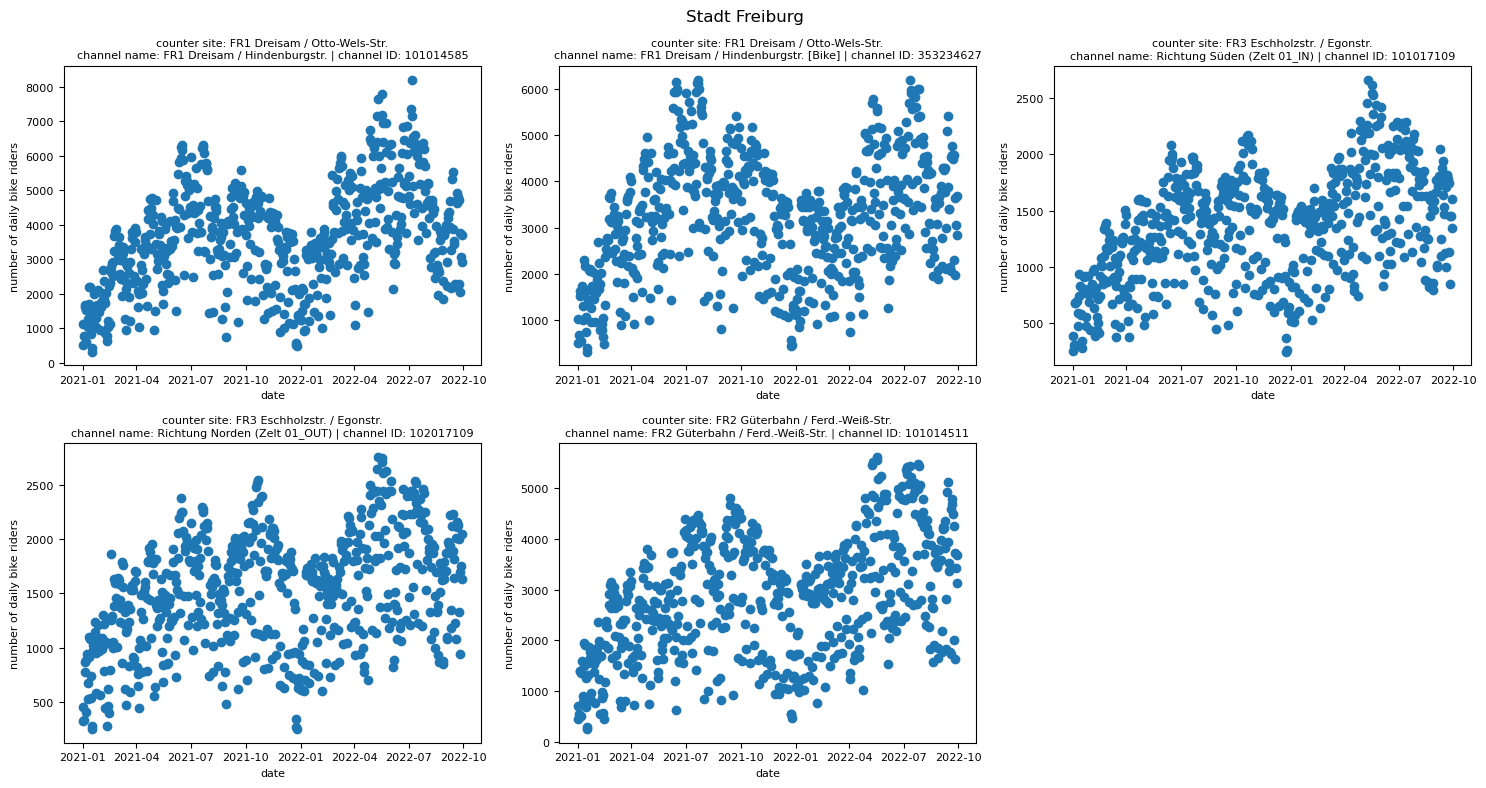

In [29]:
# example: 'Stadt Freiburg'
plot_cities_cleaned_rider_counts_by_channel('Stadt Freiburg')

In [30]:
# uncomment to plot for all cities
#for city in cities:
#    plot_cities_cleaned_rider_counts_by_channel(city)

TODO  
- list number of excluded hourly datapoints...

TODO  
Auf eine channel ID pro counting site reduzieren? Weil ich nicht weiß, ob Datenpunkte von verschiedenen channels, Fahrtrichtungen... unabhängig sind.

TODO Bericht  
- Überlegungen berichten:
    - Kriterien für data exclusion: (0-streak because assumption "counting station was turned off", sum of 24 hourly measurements)
    - Data of just one channel ID per counter site to (hopefully) fulfill independence of datapoints
- Genauigkeit der Daten berichten:
    - Temperaturdaten
    - Fahrradzählerdaten... 95%... eco-counter...